The dataset used in this notebook can be found in this folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
salary_data = pd.read_csv("Position_Salaries.csv")

In [3]:
salary_data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Data preprocessing
    
    1. First things first we need to split data to Features and labels
    
    In this case we won't need to scale data because we have just one feature so every feature is in the same scale.
    Interestingly we have just 10 samples which is too small to split into Training and testing portions.

In [4]:
features = salary_data.iloc[:, 1:-1].values
labels = salary_data.iloc[:, 2].values

In [5]:
print(features)
print(labels)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


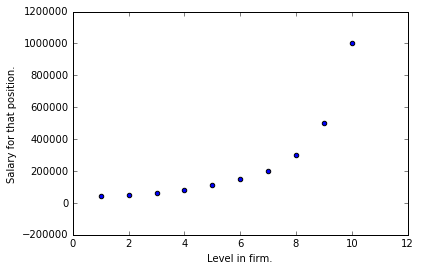

In [6]:
plt.scatter(features, labels)
plt.xlabel("Level in firm.")
plt.ylabel("Salary for that position.")
plt.show()

As we can see, probably normal Linear Regression won't be good here, but let's try so we can be 100% sure.

### Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()
lr.fit(features, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

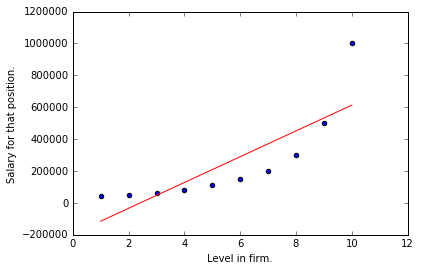

In [9]:
plt.scatter(features, labels)
plt.plot(features, lr.predict(features), c='r')
plt.xlabel("Level in firm.")
plt.ylabel("Salary for that position.")
plt.show()

As we already assumed this model is not going to work well.

In [10]:
print("R^2 score for Linear Regresion on this dataset: ", lr.score(features, labels))

R^2 score for Linear Regresion on this dataset:  0.669041233193


To handle this dataset we will need Polynomial Regression. We are going to make it by adding new features.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
polynomial_reg = PolynomialFeatures(degree=3)

In [13]:
polynomial_features = polynomial_reg.fit_transform(features)

In [14]:
polynomial_features

array([[    1.,     1.,     1.,     1.],
       [    1.,     2.,     4.,     8.],
       [    1.,     3.,     9.,    27.],
       [    1.,     4.,    16.,    64.],
       [    1.,     5.,    25.,   125.],
       [    1.,     6.,    36.,   216.],
       [    1.,     7.,    49.,   343.],
       [    1.,     8.,    64.,   512.],
       [    1.,     9.,    81.,   729.],
       [    1.,    10.,   100.,  1000.]])

In [15]:
polynomial_reg.fit(polynomial_features, labels)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [16]:
poly_reg_new = LinearRegression()
poly_reg_new.fit(polynomial_features, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

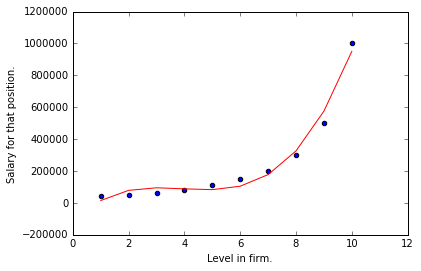

In [17]:
plt.scatter(features, labels)
plt.plot(features, poly_reg_new.predict(polynomial_features), c='r')
plt.xlabel("Level in firm.")
plt.ylabel("Salary for that position.")
plt.show()

This model is looking pretty good right now.

In [18]:
print("R^2 score for Linear Regresion on this dataset: ", poly_reg_new.score(polynomial_features, labels))

R^2 score for Linear Regresion on this dataset:  0.981209772791


By using right classifer we improved R^2 score from 67%, Simple Liner Regression, to 98% for Polynomial regression.